# **Importing necessary library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm


# **Load the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/datamining/dataset/dataset.csv"

In [4]:
dataset = pd.read_csv(DATA_DIR)

# **Data Analysis**

In [5]:
dataset.head()

,brandname,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
0,acer,Aspire 5,I5G10,NaN,Intel UHD,16.0,256.0,NaN,16.0,fhd,84000
1,acer,Aspire 5,I5G10,NaN,Intel UHD,8.0,512.0,NaN,16.0,hd,90000
2,acer,Swift 3,I5G10,NaN,MX350,8.0,256.0,NaN,14.0,fhd,89000
3,acer,Swift 3,I5G10,NaN,MX350,8.0,512.0,NaN,14.0,fhd,93000
4,acer,Swift 3,I7G10,NaN,MX350,8.0,512.0,NaN,14.0,fhd,115990


# understanding the dataset
## all feature name:
1.   brandname
2.   model
1.   cpucore
2.   refreshclock
1.   gpu
2.   ram
1.   ssd
2.   rom
1.   display
2.   displayquality
1.   price (need to predict)



In [6]:
print(dataset.shape)

(834, 11)



```
Missing Values
All The Numerical Variables
Distribution of the Numerical Variables
Categorical Variables
Cardinality of Categorical Variables
Outliers
Relationship between independent and dependent feature(SalePrice)
```




# Determinig the category of features

In [7]:
dataset.head(845)

,brandname,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
0,acer,Aspire 5,I5G10,NaN,Intel UHD,16.0,256.0,NaN,16.0,fhd,84000
1,acer,Aspire 5,I5G10,NaN,Intel UHD,8.0,512.0,NaN,16.0,hd,90000
2,acer,Swift 3,I5G10,NaN,MX350,8.0,256.0,NaN,14.0,fhd,89000
3,acer,Swift 3,I5G10,NaN,MX350,8.0,512.0,NaN,14.0,fhd,93000
4,acer,Swift 3,I7G10,NaN,MX350,8.0,512.0,NaN,14.0,fhd,115990
...,...,...,...,...,...,...,...,...,...,...,...
829,msi,GE75 Raider,I7G9,240.0,RTX 2080,32.0,512.0,NaN,17.0,fhd,350000
830,msi,GE66 Raider 10SFS,I7G10,240.0,RTX 2070 SUPER,16.0,2048.0,NaN,16.0,fhd,370000
831,msi,GE66 Raider 10SFS,I9,300.0,RTX 2070 SUPER,16.0,1024.0,NaN,16.0,fhd,370000
832,msi,GS66 Stealth 10SFS Thin,I7G10,NaN,RTX 2070,32.0,1024.0,NaN,16.0,4k,395000


In [8]:
dataset.dtypes

brandname          object
model              object
cpucore            object
refreshrate       float64
gpu                object
ram               float64
ssd               float64
rom               float64
display           float64
displayquality     object
price               int64
dtype: object

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brandname       834 non-null    object 
 1   model           834 non-null    object 
 2   cpucore         780 non-null    object 
 3   refreshrate     181 non-null    float64
 4   gpu             519 non-null    object 
 5   ram             792 non-null    float64
 6   ssd             713 non-null    float64
 7   rom             139 non-null    float64
 8   display         742 non-null    float64
 9   displayquality  684 non-null    object 
 10  price           834 non-null    int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 71.8+ KB


In [10]:
dataset.describe()

,refreshrate,ram,ssd,rom,display,price
count,181.000000,792.000000,713.000000,139.000000,742.000000,834.000000
mean,145.259669,11.227273,457.840112,1006.906475,14.983827,150207.426859
std,41.617357,6.307651,254.023653,180.227750,1.387143,68090.446848
min,60.000000,4.000000,1.000000,256.000000,6.000000,29999.000000
25%,144.000000,8.000000,256.000000,1024.000000,14.000000,105000.000000
50%,144.000000,8.000000,512.000000,1024.000000,16.000000,140000.000000
75%,144.000000,16.000000,512.000000,1024.000000,16.000000,183000.000000
max,300.000000,64.000000,2048.000000,2048.000000,24.000000,450000.000000


# understanding the dataset
## all feature name:
1.   brandname (categorical)
2.   model (categorical)
1.   cpucore (categorical)
2.   refreshclock (numerical)
1.   gpu (categorical)
2.   ram (numerical)
1.   ssd (numerical)
2.   rom (numerical)
1.   display (numerical)
2.   displayquality (categorical)
1.   price (numerical)



# **Missing Values**

drop the duplicate rows

In [11]:
print(dataset['brandname'].isnull().sum())
print(dataset['cpucore'].isnull().sum())
print(dataset['refreshrate'].isnull().sum())
print(dataset['gpu'].isnull().sum())
print(dataset['ram'].isnull().sum())
print(dataset['ssd'].isnull().sum())
print(dataset['rom'].isnull().sum())
print(dataset['display'].isnull().sum())
print(dataset['displayquality'].isnull().sum())

0
54
653
315
42
121
695
92
150


In [12]:
#seeing no.of non-null values and datatype  in each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brandname       834 non-null    object 
 1   model           834 non-null    object 
 2   cpucore         780 non-null    object 
 3   refreshrate     181 non-null    float64
 4   gpu             519 non-null    object 
 5   ram             792 non-null    float64
 6   ssd             713 non-null    float64
 7   rom             139 non-null    float64
 8   display         742 non-null    float64
 9   displayquality  684 non-null    object 
 10  price           834 non-null    int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 71.8+ KB


In [13]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

cpucore 0.0647  % missing values
refreshrate 0.783  % missing values
gpu 0.3777  % missing values
ram 0.0504  % missing values
ssd 0.1451  % missing values
rom 0.8333  % missing values
display 0.1103  % missing values
displayquality 0.1799  % missing values


# **Handling the null values**


Since they are many missing values, we need to find the relationship between missing values and Price.

1.   Let's plot some diagram for this relationship




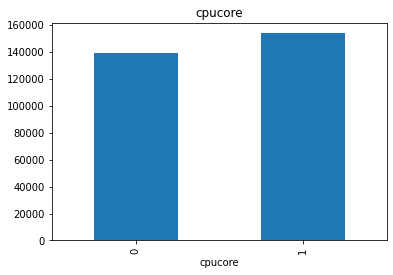

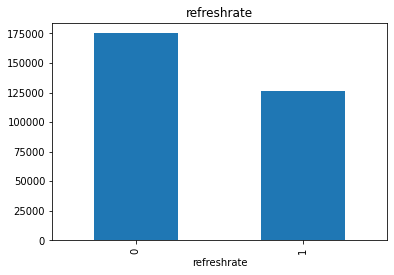

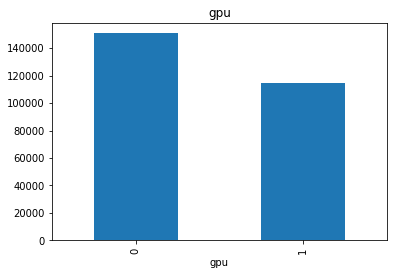

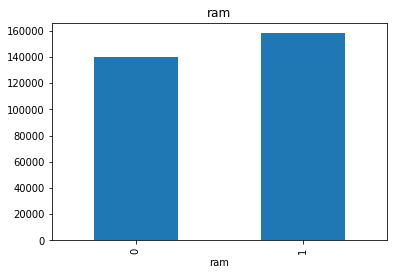

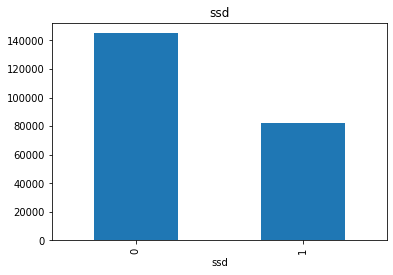

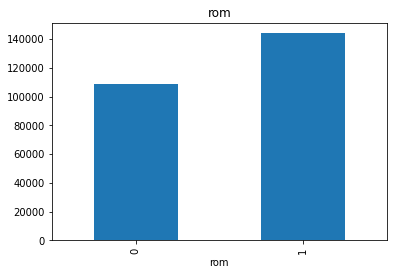

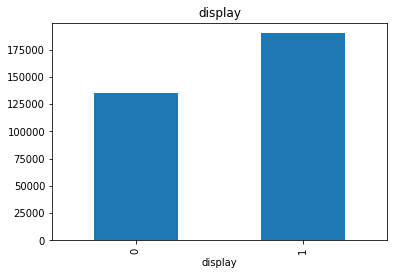

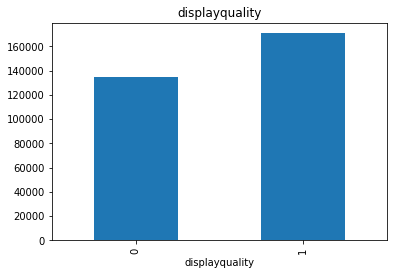

In [14]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['price'].median().plot.bar()
    plt.title(feature)
    plt.show()


Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section


[website from](https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/)


# **1. Deleting Rows**

This method commonly used to handle the null values. Here, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set. One has to make sure that after we have deleted the data, there is no addition of bias. Removing the data will lead to loss of information which will not give the expected results while predicting the output.

# Pros:
Complete removal of data with missing values results in robust and highly accurate model
Deleting a particular row or a column with no specific information is better, since it does not have a high weightage
# Cons:
Loss of information and data
Works poorly if the percentage of missing values is high (say 30%), compared to the whole dataset




# **2. Replacing With Mean/Median/Mode**

This strategy can be applied on a feature which has numeric data like the age of a person or the ticket fare. We can calculate the mean, median or mode of the feature and replace it with the missing values. This is an approximation which can add variance to the data set. But the loss of the data can be negated by this method which yields better results compared to removal of rows and columns. Replacing with the above three approximations are a statistical approach of handling the missing values. This method is also called as leaking the data while training. Another way is to approximate it with the deviation of neighbouring values. This works better if the data is linear.  



# Pros:
This is a better approach when the data size is small
It can prevent data loss which results in removal of the rows and columns
# Cons:
Imputing the approximations add variance and bias
Works poorly compared to other multiple-imputations method




# **3. Assigning An Unique Category**



A categorical feature will have a definite number of possibilities, such as gender, for example. Since they have a definite number of classes, we can assign another class for the missing values. Here, the features Cabin and Embarked have missing values which can be replaced with a new category, say, U for ‘unknown’. This strategy will add more information into the dataset which will result in the change of variance. Since they are categorical, we need to find one hot encoding to convert it to a numeric form for the algorithm to understand it. Let us look at how it can be done in Python:



# Pros:
Less possibilities with one extra category, resulting in low variance after one hot encoding — since it is categorical
Negates the loss of data by adding an unique category
# Cons:
Adds less variance
Adds another feature to the model while encoding, which may result in poor performance



# **4. Predicting The Missing Values**
Using the features which do not have missing values, we can predict the nulls with the help of a machine learning algorithm. This method may result in better accuracy, unless a missing value is expected to have a very high variance. We will be using linear regression to replace the nulls in the feature ‘age’, using other available features. One can experiment with different algorithms and check which gives the best accuracy instead of sticking to a single algorithm.



# Pros:
Imputing the missing variable is an improvement as long as the bias from the same is smaller than the omitted variable bias
Yields unbiased estimates of the model parameters
# Cons:
Bias also arises when an incomplete conditioning set is used for a categorical variable
Considered only as a proxy for the true values




# **5. Using Algorithms Which Support Missing Values**

KNN is a machine learning algorithm which works on the principle of distance measure. This algorithm can be used when there are nulls present in the dataset. While the algorithm is applied, KNN considers the missing values by taking the majority of the K nearest values. In this particular dataset, taking into account the person’s age, sex, class etc, we will assume that people having same data for the above mentioned features will have the same kind of fare.

Unfortunately, the SciKit Learn library for the K – Nearest Neighbour algorithm in Python does not support the presence of the missing values.

Another algorithm which can be used here is RandomForest. This model produces a robust result because it works well on non-linear and the categorical data. It adapts to the data structure taking into consideration of the high variance or the bias, producing better results on large datasets.

# Pros:
Does not require creation of a predictive model for each attribute with missing data in the dataset
Correlation of the data is neglected
## Cons:
Is a very time consuming process and it can be critical in data mining where large databases are being extracted
Choice of distance functions can be Euclidean, Manhattan etc. which is do not yield a robust result



























In [15]:
dataset.isnull().sum()

brandname           0
model               0
cpucore            54
refreshrate       653
gpu               315
ram                42
ssd               121
rom               695
display            92
displayquality    150
price               0
dtype: int64

In [16]:
dataset.notnull().sum()

brandname         834
model             834
cpucore           780
refreshrate       181
gpu               519
ram               792
ssd               713
rom               139
display           742
displayquality    684
price             834
dtype: int64

In [17]:
#setting brandname as index(ie brandname instead of index(symbol) number)
dataset.set_index("brandname",inplace=True)

In [18]:
dataset

,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
brandname,,,,,,,,,,
acer,Aspire 5,I5G10,NaN,Intel UHD,16.0,256.0,NaN,16.0,fhd,84000
acer,Aspire 5,I5G10,NaN,Intel UHD,8.0,512.0,NaN,16.0,hd,90000
acer,Swift 3,I5G10,NaN,MX350,8.0,256.0,NaN,14.0,fhd,89000
acer,Swift 3,I5G10,NaN,MX350,8.0,512.0,NaN,14.0,fhd,93000
acer,Swift 3,I7G10,NaN,MX350,8.0,512.0,NaN,14.0,fhd,115990
...,...,...,...,...,...,...,...,...,...,...
msi,GE75 Raider,I7G9,240.0,RTX 2080,32.0,512.0,NaN,17.0,fhd,350000
msi,GE66 Raider 10SFS,I7G10,240.0,RTX 2070 SUPER,16.0,2048.0,NaN,16.0,fhd,370000
msi,GE66 Raider 10SFS,I9,300.0,RTX 2070 SUPER,16.0,1024.0,NaN,16.0,fhd,370000


In [19]:
#we have total 10 columns now(excluding brandname)
#keeping only those rows which have alteast 5 valid values i.e. deleting rows with 5 or more inavlid(null) values
dataset1=dataset.dropna(thresh=5)

In [20]:
dataset1

,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
brandname,,,,,,,,,,
acer,Aspire 5,I5G10,NaN,Intel UHD,16.0,256.0,NaN,16.0,fhd,84000
acer,Aspire 5,I5G10,NaN,Intel UHD,8.0,512.0,NaN,16.0,hd,90000
acer,Swift 3,I5G10,NaN,MX350,8.0,256.0,NaN,14.0,fhd,89000
acer,Swift 3,I5G10,NaN,MX350,8.0,512.0,NaN,14.0,fhd,93000
acer,Swift 3,I7G10,NaN,MX350,8.0,512.0,NaN,14.0,fhd,115990
...,...,...,...,...,...,...,...,...,...,...
msi,GE75 Raider,I7G9,240.0,RTX 2080,32.0,512.0,NaN,17.0,fhd,350000
msi,GE66 Raider 10SFS,I7G10,240.0,RTX 2070 SUPER,16.0,2048.0,NaN,16.0,fhd,370000
msi,GE66 Raider 10SFS,I9,300.0,RTX 2070 SUPER,16.0,1024.0,NaN,16.0,fhd,370000


In [21]:
# replacing null value for ssd and hdd by 0 as when one has valid value other has 0 in most cases.
dataset2=dataset1.fillna({'ssd':0,
                                'rom':0
})

In [22]:
dataset2

,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
brandname,,,,,,,,,,
acer,Aspire 5,I5G10,NaN,Intel UHD,16.0,256.0,0.0,16.0,fhd,84000
acer,Aspire 5,I5G10,NaN,Intel UHD,8.0,512.0,0.0,16.0,hd,90000
acer,Swift 3,I5G10,NaN,MX350,8.0,256.0,0.0,14.0,fhd,89000
acer,Swift 3,I5G10,NaN,MX350,8.0,512.0,0.0,14.0,fhd,93000
acer,Swift 3,I7G10,NaN,MX350,8.0,512.0,0.0,14.0,fhd,115990
...,...,...,...,...,...,...,...,...,...,...
msi,GE75 Raider,I7G9,240.0,RTX 2080,32.0,512.0,0.0,17.0,fhd,350000
msi,GE66 Raider 10SFS,I7G10,240.0,RTX 2070 SUPER,16.0,2048.0,0.0,16.0,fhd,370000
msi,GE66 Raider 10SFS,I9,300.0,RTX 2070 SUPER,16.0,1024.0,0.0,16.0,fhd,370000


In [23]:
#we have total 10 columns now(excluding brandname)
#keeping only those rows which have alteast 5 valid values i.e. deleting rows with 5 or more inavlid(null) values after replacing missing(null) values in rom and ssd with 0.
dataset3=dataset2.dropna(thresh=5)

In [24]:
dataset3

,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
brandname,,,,,,,,,,
acer,Aspire 5,I5G10,NaN,Intel UHD,16.0,256.0,0.0,16.0,fhd,84000
acer,Aspire 5,I5G10,NaN,Intel UHD,8.0,512.0,0.0,16.0,hd,90000
acer,Swift 3,I5G10,NaN,MX350,8.0,256.0,0.0,14.0,fhd,89000
acer,Swift 3,I5G10,NaN,MX350,8.0,512.0,0.0,14.0,fhd,93000
acer,Swift 3,I7G10,NaN,MX350,8.0,512.0,0.0,14.0,fhd,115990
...,...,...,...,...,...,...,...,...,...,...
msi,GE75 Raider,I7G9,240.0,RTX 2080,32.0,512.0,0.0,17.0,fhd,350000
msi,GE66 Raider 10SFS,I7G10,240.0,RTX 2070 SUPER,16.0,2048.0,0.0,16.0,fhd,370000
msi,GE66 Raider 10SFS,I9,300.0,RTX 2070 SUPER,16.0,1024.0,0.0,16.0,fhd,370000


In [25]:
#replacing null values of gpu by intel
dataset4=dataset3.fillna({'gpu':"Intel"
})

In [26]:
dataset4

,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
brandname,,,,,,,,,,
acer,Aspire 5,I5G10,NaN,Intel UHD,16.0,256.0,0.0,16.0,fhd,84000
acer,Aspire 5,I5G10,NaN,Intel UHD,8.0,512.0,0.0,16.0,hd,90000
acer,Swift 3,I5G10,NaN,MX350,8.0,256.0,0.0,14.0,fhd,89000
acer,Swift 3,I5G10,NaN,MX350,8.0,512.0,0.0,14.0,fhd,93000
acer,Swift 3,I7G10,NaN,MX350,8.0,512.0,0.0,14.0,fhd,115990
...,...,...,...,...,...,...,...,...,...,...
msi,GE75 Raider,I7G9,240.0,RTX 2080,32.0,512.0,0.0,17.0,fhd,350000
msi,GE66 Raider 10SFS,I7G10,240.0,RTX 2070 SUPER,16.0,2048.0,0.0,16.0,fhd,370000
msi,GE66 Raider 10SFS,I9,300.0,RTX 2070 SUPER,16.0,1024.0,0.0,16.0,fhd,370000


In [27]:
#checking number of null(NaN) values in each column after filling missing(null) values of gpu,rom,ssd
print("\nTotal missing value in each column in Dataframe:\n",dataset4.isnull().sum())


Total missing value in each column in Dataframe:
 model               0
cpucore            31
refreshrate       618
gpu                 0
ram                10
ssd                 0
rom                 0
display            63
displayquality    117
price               0
dtype: int64


In [28]:
#reseting index to default
dataset4.reset_index()

,brandname,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
0,acer,Aspire 5,I5G10,NaN,Intel UHD,16.0,256.0,0.0,16.0,fhd,84000
1,acer,Aspire 5,I5G10,NaN,Intel UHD,8.0,512.0,0.0,16.0,hd,90000
2,acer,Swift 3,I5G10,NaN,MX350,8.0,256.0,0.0,14.0,fhd,89000
3,acer,Swift 3,I5G10,NaN,MX350,8.0,512.0,0.0,14.0,fhd,93000
4,acer,Swift 3,I7G10,NaN,MX350,8.0,512.0,0.0,14.0,fhd,115990
...,...,...,...,...,...,...,...,...,...,...,...
794,msi,GE75 Raider,I7G9,240.0,RTX 2080,32.0,512.0,0.0,17.0,fhd,350000
795,msi,GE66 Raider 10SFS,I7G10,240.0,RTX 2070 SUPER,16.0,2048.0,0.0,16.0,fhd,370000
796,msi,GE66 Raider 10SFS,I9,300.0,RTX 2070 SUPER,16.0,1024.0,0.0,16.0,fhd,370000
797,msi,GS66 Stealth 10SFS Thin,I7G10,NaN,RTX 2070,32.0,1024.0,0.0,16.0,4k,395000


In [29]:
#checking number of null(NaN) values in each column
print("\nTotal missing value in each column in Dataframe:\n",dataset4.isnull().sum())


Total missing value in each column in Dataframe:
 model               0
cpucore            31
refreshrate       618
gpu                 0
ram                10
ssd                 0
rom                 0
display            63
displayquality    117
price               0
dtype: int64


In [30]:
# Impute display quality and cpucore with mode (Categorical Variable) by "Generalized imputation"
dataset4['displayquality'].fillna(dataset4['displayquality'].mode()[0], inplace = True)
dataset4['cpucore'].fillna(dataset4['cpucore'].mode()[0], inplace = True)

In [31]:
dataset4

,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
brandname,,,,,,,,,,
acer,Aspire 5,I5G10,NaN,Intel UHD,16.0,256.0,0.0,16.0,fhd,84000
acer,Aspire 5,I5G10,NaN,Intel UHD,8.0,512.0,0.0,16.0,hd,90000
acer,Swift 3,I5G10,NaN,MX350,8.0,256.0,0.0,14.0,fhd,89000
acer,Swift 3,I5G10,NaN,MX350,8.0,512.0,0.0,14.0,fhd,93000
acer,Swift 3,I7G10,NaN,MX350,8.0,512.0,0.0,14.0,fhd,115990
...,...,...,...,...,...,...,...,...,...,...
msi,GE75 Raider,I7G9,240.0,RTX 2080,32.0,512.0,0.0,17.0,fhd,350000
msi,GE66 Raider 10SFS,I7G10,240.0,RTX 2070 SUPER,16.0,2048.0,0.0,16.0,fhd,370000
msi,GE66 Raider 10SFS,I9,300.0,RTX 2070 SUPER,16.0,1024.0,0.0,16.0,fhd,370000


In [32]:
# Impute ram with median(Numerical value) by "Generalized imputation"
dataset4['ram'].fillna(dataset4['ram'].median(), inplace = True)

In [33]:
dataset4

,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
brandname,,,,,,,,,,
acer,Aspire 5,I5G10,NaN,Intel UHD,16.0,256.0,0.0,16.0,fhd,84000
acer,Aspire 5,I5G10,NaN,Intel UHD,8.0,512.0,0.0,16.0,hd,90000
acer,Swift 3,I5G10,NaN,MX350,8.0,256.0,0.0,14.0,fhd,89000
acer,Swift 3,I5G10,NaN,MX350,8.0,512.0,0.0,14.0,fhd,93000
acer,Swift 3,I7G10,NaN,MX350,8.0,512.0,0.0,14.0,fhd,115990
...,...,...,...,...,...,...,...,...,...,...
msi,GE75 Raider,I7G9,240.0,RTX 2080,32.0,512.0,0.0,17.0,fhd,350000
msi,GE66 Raider 10SFS,I7G10,240.0,RTX 2070 SUPER,16.0,2048.0,0.0,16.0,fhd,370000
msi,GE66 Raider 10SFS,I9,300.0,RTX 2070 SUPER,16.0,1024.0,0.0,16.0,fhd,370000


In [34]:
# Impute display with median(Numerical value) correlating it with brandname by "Special case imputation"
dataset4['display'].fillna(dataset4.groupby(["brandname"])['display'].transform('median'),inplace=True)

In [35]:
dataset4

,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
brandname,,,,,,,,,,
acer,Aspire 5,I5G10,NaN,Intel UHD,16.0,256.0,0.0,16.0,fhd,84000
acer,Aspire 5,I5G10,NaN,Intel UHD,8.0,512.0,0.0,16.0,hd,90000
acer,Swift 3,I5G10,NaN,MX350,8.0,256.0,0.0,14.0,fhd,89000
acer,Swift 3,I5G10,NaN,MX350,8.0,512.0,0.0,14.0,fhd,93000
acer,Swift 3,I7G10,NaN,MX350,8.0,512.0,0.0,14.0,fhd,115990
...,...,...,...,...,...,...,...,...,...,...
msi,GE75 Raider,I7G9,240.0,RTX 2080,32.0,512.0,0.0,17.0,fhd,350000
msi,GE66 Raider 10SFS,I7G10,240.0,RTX 2070 SUPER,16.0,2048.0,0.0,16.0,fhd,370000
msi,GE66 Raider 10SFS,I9,300.0,RTX 2070 SUPER,16.0,1024.0,0.0,16.0,fhd,370000


In [36]:
# Impute display with mode(Numerical value) correlating it with both display and displayquality by "Special case imputation"
dataset4['refreshrate'].fillna(dataset4.groupby(["display","displayquality"])['refreshrate'].transform('median'),inplace=True)

In [37]:
dataset4

,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
brandname,,,,,,,,,,
acer,Aspire 5,I5G10,144.0,Intel UHD,16.0,256.0,0.0,16.0,fhd,84000
acer,Aspire 5,I5G10,60.0,Intel UHD,8.0,512.0,0.0,16.0,hd,90000
acer,Swift 3,I5G10,144.0,MX350,8.0,256.0,0.0,14.0,fhd,89000
acer,Swift 3,I5G10,144.0,MX350,8.0,512.0,0.0,14.0,fhd,93000
acer,Swift 3,I7G10,144.0,MX350,8.0,512.0,0.0,14.0,fhd,115990
...,...,...,...,...,...,...,...,...,...,...
msi,GE75 Raider,I7G9,240.0,RTX 2080,32.0,512.0,0.0,17.0,fhd,350000
msi,GE66 Raider 10SFS,I7G10,240.0,RTX 2070 SUPER,16.0,2048.0,0.0,16.0,fhd,370000
msi,GE66 Raider 10SFS,I9,300.0,RTX 2070 SUPER,16.0,1024.0,0.0,16.0,fhd,370000


In [38]:
#checking number of null(NaN) values in each column
print("\nTotal missing value in each column in Dataframe:\n",dataset4.isnull().sum())


Total missing value in each column in Dataframe:
 model               0
cpucore             0
refreshrate       161
gpu                 0
ram                 0
ssd                 0
rom                 0
display             0
displayquality      0
price               0
dtype: int64


In [39]:
# Impute display with mode(Numerical value) correlating it with  displayquality only by "Special case imputation"
dataset4['refreshrate'].fillna(dataset4.groupby(["displayquality"])['refreshrate'].transform('median'),inplace=True)

In [40]:
#checking number of null(NaN) values in each column
print("\nTotal missing value in each column in Dataframe:\n",dataset4.isnull().sum())


Total missing value in each column in Dataframe:
 model               0
cpucore             0
refreshrate       100
gpu                 0
ram                 0
ssd                 0
rom                 0
display             0
displayquality      0
price               0
dtype: int64


In [41]:
# Impute display with mode(Numerical value) correlating it with  display only by "Special case imputation"
dataset4['refreshrate'].fillna(dataset4.groupby(["display"])['refreshrate'].transform('median'),inplace=True)

In [42]:
dataset4

,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
brandname,,,,,,,,,,
acer,Aspire 5,I5G10,144.0,Intel UHD,16.0,256.0,0.0,16.0,fhd,84000
acer,Aspire 5,I5G10,60.0,Intel UHD,8.0,512.0,0.0,16.0,hd,90000
acer,Swift 3,I5G10,144.0,MX350,8.0,256.0,0.0,14.0,fhd,89000
acer,Swift 3,I5G10,144.0,MX350,8.0,512.0,0.0,14.0,fhd,93000
acer,Swift 3,I7G10,144.0,MX350,8.0,512.0,0.0,14.0,fhd,115990
...,...,...,...,...,...,...,...,...,...,...
msi,GE75 Raider,I7G9,240.0,RTX 2080,32.0,512.0,0.0,17.0,fhd,350000
msi,GE66 Raider 10SFS,I7G10,240.0,RTX 2070 SUPER,16.0,2048.0,0.0,16.0,fhd,370000
msi,GE66 Raider 10SFS,I9,300.0,RTX 2070 SUPER,16.0,1024.0,0.0,16.0,fhd,370000


In [43]:
#checking number of null(NaN) values in each column
print("\nTotal missing value in each column in Dataframe:\n",dataset4.isnull().sum())


Total missing value in each column in Dataframe:
 model             0
cpucore           0
refreshrate       0
gpu               0
ram               0
ssd               0
rom               0
display           0
displayquality    0
price             0
dtype: int64


In [44]:
dataset4

,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
brandname,,,,,,,,,,
acer,Aspire 5,I5G10,144.0,Intel UHD,16.0,256.0,0.0,16.0,fhd,84000
acer,Aspire 5,I5G10,60.0,Intel UHD,8.0,512.0,0.0,16.0,hd,90000
acer,Swift 3,I5G10,144.0,MX350,8.0,256.0,0.0,14.0,fhd,89000
acer,Swift 3,I5G10,144.0,MX350,8.0,512.0,0.0,14.0,fhd,93000
acer,Swift 3,I7G10,144.0,MX350,8.0,512.0,0.0,14.0,fhd,115990
...,...,...,...,...,...,...,...,...,...,...
msi,GE75 Raider,I7G9,240.0,RTX 2080,32.0,512.0,0.0,17.0,fhd,350000
msi,GE66 Raider 10SFS,I7G10,240.0,RTX 2070 SUPER,16.0,2048.0,0.0,16.0,fhd,370000
msi,GE66 Raider 10SFS,I9,300.0,RTX 2070 SUPER,16.0,1024.0,0.0,16.0,fhd,370000


In [45]:
# After null value analysis complition
dataset4.to_csv("/content/drive/MyDrive/Colab Notebooks/datamining/removednullvaluedataset.csv")

In [46]:
# list of numerical variables
numerical_features = [feature for feature in dataset4.columns if dataset4[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset4[numerical_features].head()

Number of numerical variables:  6


,refreshrate,ram,ssd,rom,display,price
brandname,,,,,,
acer,144.0,16.0,256.0,0.0,16.0,84000
acer,60.0,8.0,512.0,0.0,16.0,90000
acer,144.0,8.0,256.0,0.0,14.0,89000
acer,144.0,8.0,512.0,0.0,14.0,93000
acer,144.0,8.0,512.0,0.0,14.0,115990


In [47]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, acer to msi
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   model           799 non-null    object 
 1   cpucore         799 non-null    object 
 2   refreshrate     799 non-null    float64
 3   gpu             799 non-null    object 
 4   ram             799 non-null    float64
 5   ssd             799 non-null    float64
 6   rom             799 non-null    float64
 7   display         799 non-null    float64
 8   displayquality  799 non-null    object 
 9   price           799 non-null    int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 68.7+ KB


# **outlier detection and removal**

In [48]:
dataset4

,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
brandname,,,,,,,,,,
acer,Aspire 5,I5G10,144.0,Intel UHD,16.0,256.0,0.0,16.0,fhd,84000
acer,Aspire 5,I5G10,60.0,Intel UHD,8.0,512.0,0.0,16.0,hd,90000
acer,Swift 3,I5G10,144.0,MX350,8.0,256.0,0.0,14.0,fhd,89000
acer,Swift 3,I5G10,144.0,MX350,8.0,512.0,0.0,14.0,fhd,93000
acer,Swift 3,I7G10,144.0,MX350,8.0,512.0,0.0,14.0,fhd,115990
...,...,...,...,...,...,...,...,...,...,...
msi,GE75 Raider,I7G9,240.0,RTX 2080,32.0,512.0,0.0,17.0,fhd,350000
msi,GE66 Raider 10SFS,I7G10,240.0,RTX 2070 SUPER,16.0,2048.0,0.0,16.0,fhd,370000
msi,GE66 Raider 10SFS,I9,300.0,RTX 2070 SUPER,16.0,1024.0,0.0,16.0,fhd,370000




```
Most common causes of outliers on a data set:
Data entry errors (human errors)
Measurement errors (instrument errors)
Experimental errors (data extraction or experiment planning/executing errors)
Intentional (dummy outliers made to test detection methods)
Data processing errors (data manipulation or data set unintended mutations)
Sampling errors (extracting or mixing data from wrong or various sources)
Natural (not an error, novelties in data)
```





```
Some of the most popular methods for outlier detection are:
Z-Score or Extreme Value Analysis (parametric)
Probabilistic and Statistical Modeling (parametric)
Linear Regression Models (PCA, LMS)
Proximity Based Models (non-parametric)
Information Theory Models
High Dimensional Outlier Detection Methods (high dimensional sparse data)
```



**Z-Score**

The z-score or standard score of an observation is a metric that indicates how many standard deviations a data point is from the sample’s mean, assuming a gaussian distribution. This makes z-score a parametric method. Very frequently data points are not to described by a gaussian distribution, this problem can be solved by applying transformations to data ie: scaling it.
Some Python libraries like Scipy and Sci-kit Learn have easy to use functions and classes for a easy implementation along with Pandas and Numpy.
After making the appropriate transformations to the selected feature space of the dataset, the z-score of any data point can be calculated with the following expression:

z = (x - mean)/standard_deviation


When computing the z-score for each sample on the data set a threshold must be specified. Some good ‘thumb-rule’ thresholds can be: 2.5, 3, 3.5 or more standard deviations.




[refrence page](https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561)


# Z-Score or Extreme Value Analysis (parametric)

In [49]:
dataset4

,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
brandname,,,,,,,,,,
acer,Aspire 5,I5G10,144.0,Intel UHD,16.0,256.0,0.0,16.0,fhd,84000
acer,Aspire 5,I5G10,60.0,Intel UHD,8.0,512.0,0.0,16.0,hd,90000
acer,Swift 3,I5G10,144.0,MX350,8.0,256.0,0.0,14.0,fhd,89000
acer,Swift 3,I5G10,144.0,MX350,8.0,512.0,0.0,14.0,fhd,93000
acer,Swift 3,I7G10,144.0,MX350,8.0,512.0,0.0,14.0,fhd,115990
...,...,...,...,...,...,...,...,...,...,...
msi,GE75 Raider,I7G9,240.0,RTX 2080,32.0,512.0,0.0,17.0,fhd,350000
msi,GE66 Raider 10SFS,I7G10,240.0,RTX 2070 SUPER,16.0,2048.0,0.0,16.0,fhd,370000
msi,GE66 Raider 10SFS,I9,300.0,RTX 2070 SUPER,16.0,1024.0,0.0,16.0,fhd,370000


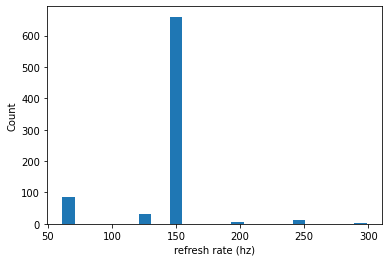

In [50]:
# in refresh rate
plt.hist(dataset4.refreshrate, bins=20, rwidth=0.8)
plt.xlabel('refresh rate (hz)')
plt.ylabel('Count')
plt.show()

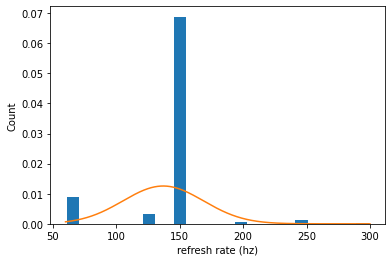

In [51]:
plt.hist(dataset4.refreshrate, bins=20, rwidth=0.8, density=True)
plt.xlabel('refresh rate (hz)')
plt.ylabel('Count')

rng = np.arange(dataset4.refreshrate.min(), dataset4.refreshrate.max(), 0.1)
plt.plot(rng, norm.pdf(rng,dataset4.refreshrate.mean(),dataset4.refreshrate.std()))

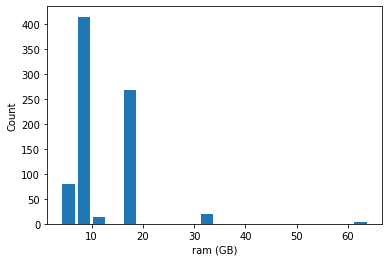

In [52]:
# in ram
plt.hist(dataset4.ram, bins=20, rwidth=0.8)
plt.xlabel('ram (GB)')
plt.ylabel('Count')
plt.show()

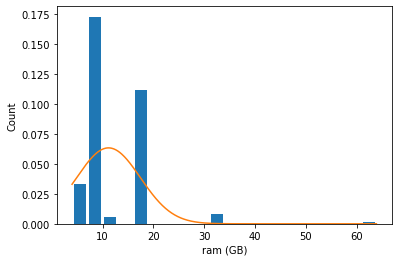

In [53]:
plt.hist(dataset4.ram, bins=20, rwidth=0.8, density=True)
plt.xlabel('ram (GB)')
plt.ylabel('Count')

rng = np.arange(dataset4.ram.min(), dataset4.ram.max(), 0.1)
plt.plot(rng, norm.pdf(rng,dataset4.ram.mean(),dataset4.ram.std()))

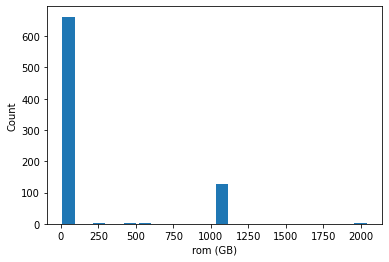

In [54]:
# in rom
plt.hist(dataset4.rom, bins=20, rwidth=0.8)
plt.xlabel('rom (GB)')
plt.ylabel('Count')
plt.show()

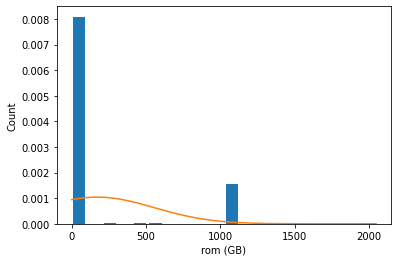

In [55]:
plt.hist(dataset4.rom, bins=20, rwidth=0.8, density=True)
plt.xlabel('rom (GB)')
plt.ylabel('Count')

rng = np.arange(dataset4.rom.min(), dataset4.rom.max(), 0.1)
plt.plot(rng, norm.pdf(rng,dataset4.rom.mean(),dataset4.rom.std()))

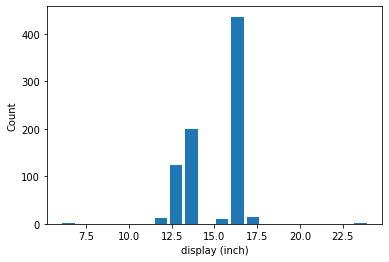

In [56]:

# in display
plt.hist(dataset4.display, bins=20, rwidth=0.8)
plt.xlabel('display (inch)')
plt.ylabel('Count')
plt.show()

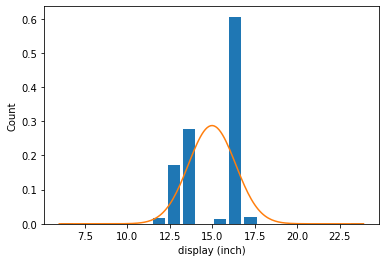

In [57]:
plt.hist(dataset4.display, bins=20, rwidth=0.8, density=True)
plt.xlabel('display (inch)')
plt.ylabel('Count')

rng = np.arange(dataset4.display.min(), dataset4.display.max(), 0.1)
plt.plot(rng, norm.pdf(rng,dataset4.display.mean(),dataset4.display.std()))

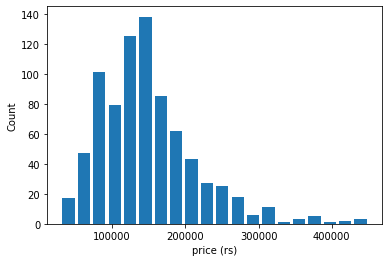

In [58]:
# in price
plt.hist(dataset4.price, bins=20, rwidth=0.8)
plt.xlabel('price (rs)')
plt.ylabel('Count')
plt.show()

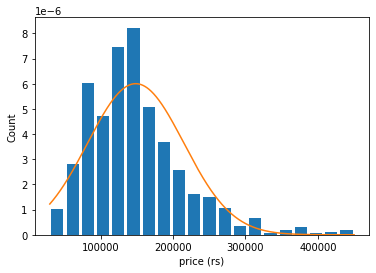

In [59]:
plt.hist(dataset4.price, bins=20, rwidth=0.8, density=True)
plt.xlabel('price (rs)')
plt.ylabel('Count')

rng = np.arange(dataset4.price.min(), dataset4.price.max(), 0.1)
plt.plot(rng, norm.pdf(rng,dataset4.price.mean(),dataset4.price.std()))

In [60]:
print("mean = {}".format(dataset4.price.mean()))
print("median = {}".format(dataset4.price.median()))
print("mode = {}".format(dataset4.price.mode()))
# Outlier detection and removal using Z Score

dataset4['zscore_price'] = ( dataset4.price - dataset4.price.mean() ) / dataset4.price.std()
dataset4.head(20)
print(dataset4[dataset4['zscore_price']>4])
print(dataset4[dataset4['zscore_price'] < -4])
dataset4_removed_outlier_price = dataset4[(dataset4.zscore_price>-4) & (dataset4.zscore_price<4)]
print(dataset4_removed_outlier_price.head())
# Remove two columns name is "zscore_price"
dataset4_removed_outlier_price = dataset4_removed_outlier_price.drop(['zscore_price'], axis = 1)
print(dataset4_removed_outlier_price.head())
print(dataset4_removed_outlier_price.info())

mean = 148556.09386733416
median = 139000.0
mode = 0    115000
1    135000
dtype: int64
                           model cpucore  ...   price zscore_price
brandname                                 ...                     
msi        msi Creator 15 A10SFS   I7G10  ...  418000     4.053947
alienware              AREA-51M     I7G9  ...  432800     4.276622
alienware               AREA-51M   I7G10  ...  432800     4.276622
msi            Creator 15 A10SFS   I7G10  ...  450000     4.535406

[4 rows x 11 columns]
Empty DataFrame
Columns: [model, cpucore, refreshrate, gpu, ram, ssd, rom, display, displayquality, price, zscore_price]
Index: []
              model cpucore  refreshrate  ... displayquality   price  zscore_price
brandname                                 ...                                     
acer       Aspire 5   I5G10        144.0  ...            fhd   84000     -0.971286
acer       Aspire 5   I5G10         60.0  ...             hd   90000     -0.881012
acer        Swift 3   I5

In [61]:
dataset4_removed_outlier_price.to_csv("/content/drive/MyDrive/Colab Notebooks/datamining/removed_outlier.csv")

In [62]:
mydataframe_new = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datamining/removed_outlier.csv")

In [63]:
mydataframe_new

,brandname,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
0,acer,Aspire 5,I5G10,144.0,Intel UHD,16.0,256.0,0.0,16.0,fhd,84000
1,acer,Aspire 5,I5G10,60.0,Intel UHD,8.0,512.0,0.0,16.0,hd,90000
2,acer,Swift 3,I5G10,144.0,MX350,8.0,256.0,0.0,14.0,fhd,89000
3,acer,Swift 3,I5G10,144.0,MX350,8.0,512.0,0.0,14.0,fhd,93000
4,acer,Swift 3,I7G10,144.0,MX350,8.0,512.0,0.0,14.0,fhd,115990
...,...,...,...,...,...,...,...,...,...,...,...
790,msi,GS65 Raider 9SF,I7G9,144.0,GTX 2070,16.0,1024.0,0.0,16.0,fhd,310000
791,msi,GE75 Raider,I7G9,240.0,RTX 2080,32.0,512.0,0.0,17.0,fhd,350000
792,msi,GE66 Raider 10SFS,I7G10,240.0,RTX 2070 SUPER,16.0,2048.0,0.0,16.0,fhd,370000
793,msi,GE66 Raider 10SFS,I9,300.0,RTX 2070 SUPER,16.0,1024.0,0.0,16.0,fhd,370000


In [64]:
mydataframe_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brandname       795 non-null    object 
 1   model           795 non-null    object 
 2   cpucore         795 non-null    object 
 3   refreshrate     795 non-null    float64
 4   gpu             795 non-null    object 
 5   ram             795 non-null    float64
 6   ssd             795 non-null    float64
 7   rom             795 non-null    float64
 8   display         795 non-null    float64
 9   displayquality  795 non-null    object 
 10  price           795 non-null    int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 68.4+ KB


# Generalization
## using excel sheet
`


1.   model name is fine
2.   for model , i just kept only first 10 letters
1.   for cpucore just keep 2 first characters
2.   for gpu , just keep first 10 characters
1.   display quality is fine

`



In [65]:
# brandname,
# model, 
# cpucore,
# gpu, 
# displayquality


In [66]:
# letes import things up
cat_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datamining/truncated_categorical_data_for_generalization.csv")

In [67]:
cat_df

,brandname,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
0,acer,Aspire 5,I5,144,Intel UHD,16,256,0,16,fhd,84000
1,acer,Aspire 5,I5,60,Intel UHD,8,512,0,16,hd,90000
2,acer,Swift 3,I5,144,MX350,8,256,0,14,fhd,89000
3,acer,Swift 3,I5,144,MX350,8,512,0,14,fhd,93000
4,acer,Swift 3,I7,144,MX350,8,512,0,14,fhd,115990
...,...,...,...,...,...,...,...,...,...,...,...
790,msi,GS65 Rai,I7,144,GTX 2070,16,1024,0,16,fhd,310000
791,msi,GE75 Rai,I7,240,RTX 2080,32,512,0,17,fhd,350000
792,msi,GE66 Rai,I7,240,RTX 2070 S,16,2048,0,16,fhd,370000
793,msi,GE66 Rai,I9,300,RTX 2070 S,16,1024,0,16,fhd,370000


In [68]:
cat_df["brandname"].unique()

array(['acer', 'asus', 'dell', 'hp', 'lenovo', 'apple', 'msi',
       'microsoft', 'razer', 'ripple', 'bigbyte', 'dreammachines',
       'lenevo', 'samsung', 'macbook', 'microsoft surface', 'razer blade'],
      dtype=object)

In [69]:
cat_df["model"].unique()

array(['Aspire 5', 'Swift 3', 'Nitro 5', 'Predator', 'VivoBook',
       'ZenBook ', 'TUF F15 ', 'TUF Dash', 'TUF A15 ', 'ROG Stri',
       'Zephyrus', 'Inspiron', 'G3 G3500', 'G5 15 55', 'G5 15 SE',
       'G7 7500', 'Alienwar', 'Vostro 1', 'Latitude', 'XPS 13 7',
       'XPS 13 9', 'XPS 15 9', 'hp Lapto', 'Notebook', 'Pavilion',
       'Envy 13', 'Envy x36', 'hp Omen ', 'hp Spect', 'V14-IIL ',
       'IdeaPad ', 'Flex 5', 'Flex 14x', 'Flex 14 ', 'Yoga C74',
       'Yoga C94', 'Yoga 7i', 'Yoga Due', 'Yoga 7 2', 'Yoga Sli',
       'Yoga 9 2', 'ThinkPad', 'Thinkpad', 'TinkPad ', 'Legion 5',
       'Legion 7', 'MacBook ', 'msi Stea', 'msi GS66', 'msi GE66',
       'msi GE76', 'msi GP65', 'msi GP66', 'msi GP67', 'msi GL75',
       'msi GF63', 'msi GF65', 'msi Brav', 'msi Crea', 'msi Pres',
       'msi Mode', 'msi Summ', 'Microsof', 'Razer Bl', 'Pandora',
       'Artifact', 'Raze', 'Raze Pro', 'Genos', 'Genos Pr', '15CS3079',
       'TUF FX 5', 'PAVILION', '24-DF030', '15-GW001', 'V14', 'Hp

In [70]:
# generalize the model by keeping only 5 character from first

In [71]:
cat_df["cpucore"].unique()

array(['I5', 'I7', 'ry', 'ce', 'I3', 'm1', 'pe', 'I9'], dtype=object)

In [72]:
# celeron , pentium

In [73]:
cat_df["refreshrate"].unique()

array([144,  60, 240, 300, 120, 192])

In [74]:
cat_df["gpu"].unique()

array(['Intel UHD', 'MX350', 'Vega 8', 'GTX 1650 T', 'RTX 2060',
       'GTX 1660 T', 'RTX 2070', 'Radeon gra', 'MX330', 'Radeon Gra',
       'MX250', 'Intel Iris', 'GeForce MX', 'GeForce GT', 'GTX 1650',
       'RTX 3060', 'RTX 3070', 'RTX 3080', 'Iris Xe', 'MX230', 'Radeon',
       'RX 5600M', 'RTX 2070 S', 'Intel', 'NVIDIA 2GB', 'Radeon 530',
       'Radeon 531', 'MX130', 'Iris Plus', 'RTX 2060 M', 'Radeon RX',
       'MX450', 'Radeon Veg', 'RTX 3050', 'GTX1650 4', 'AMD Radeon',
       'NVIDIA GTX', 'Nvidia MX ', 'Nvidia MX2', 'Integrated',
       'NVIDIA GeF', 'GTX 1650 G', 'NVIDIA RTX', 'Intel hd g',
       'Intel uhd ', 'Iris Xe Gr', 'NVIDIA GEF', 'Intel uhd',
       'GTX 1050Ti', 'GTX 1050 4', 'GTX 1650 4', 'RTX 2060 6',
       'GTX 1660Ti', 'GTX 1650Ti', 'GTX 1070 8', 'RTX 2070 8',
       'RTX 2070 M', 'RTX 3060 6', 'GTX 1650ti', 'RX Vega 10',
       'GTX 1050 M', '16 MB Cach', 'GTX 1060 6', 'AMD RX 560',
       'AMD RX Veg', 'Intel Uhd ', 'T1000 4 Qu', 'NVIDIA Qua',
       'In



```
# 
inteliris
intelirisplus
intelirisxe
inteluhd
intelhd



nvidia
nvidiaquadro
nvidiaquadrot1000
nvidiaquadrom620

nvidiageforce
nvidiageforcemx
nvidiageforcemx450
nvidiageforcemx350
nvidiageforcemx330
nvidiageforcemx250
nvidiageforcemx230
nvidiageforcemx250
nvidiageforcemx130


nvidiageforcegtx1650
nvidiageforcegtx1660
nvidiageforcegtx

nvidiageforcertx2060
nvidiageforcertx2070
nvidiageforcertx3060
nvidiageforcertx3050
nvidiageforcertx3070
nvidiageforcertx3080



amdradeonvega8
amdradeonvega10
amdradeon
amdradeonrx
amdradeonrx5
amdradeon512
amdryzen

```



In [75]:
# lets fix the gpu problem
cat_df["gpu"] = cat_df["gpu"].replace('Intel UHD', 'inteluhd')
cat_df["gpu"] = cat_df["gpu"].replace('MX350', 'nvidiageforcemx350')
cat_df["gpu"] = cat_df["gpu"].replace('Vega 8', 'amdradeonvega8')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1650 T', 'nvidiageforcegtx1650')
cat_df["gpu"] = cat_df["gpu"].replace('RTX 2060', 'nvidiageforcertx2060')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1660 T', 'nvidiageforcegtx1660')
cat_df["gpu"] = cat_df["gpu"].replace('RTX 2070', 'nvidiageforcertx2070')
cat_df["gpu"] = cat_df["gpu"].replace('Radeon gra', 'amdradeon')
cat_df["gpu"] = cat_df["gpu"].replace('MX330', 'nvidiageforcemx330')
cat_df["gpu"] = cat_df["gpu"].replace('Radeon Gra', 'amdradeon')
cat_df["gpu"] = cat_df["gpu"].replace('MX250', 'nvidiageforcemx250')
cat_df["gpu"] = cat_df["gpu"].replace('Intel Iris', 'inteliris')
cat_df["gpu"] = cat_df["gpu"].replace('GeForce MX', 'nvidiageforcemx')
cat_df["gpu"] = cat_df["gpu"].replace('GeForce GT', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1650', 'nvidiageforcegtx1650')
cat_df["gpu"] = cat_df["gpu"].replace('RTX 3060', 'nvidiageforcertx3060')
cat_df["gpu"] = cat_df["gpu"].replace('RTX 3070', 'nvidiageforcertx3070')
cat_df["gpu"] = cat_df["gpu"].replace('RTX 3080', 'nvidiageforcertx3080')
cat_df["gpu"] = cat_df["gpu"].replace('Iris Xe', 'intelirisxe')
cat_df["gpu"] = cat_df["gpu"].replace('MX230', 'nvidiageforcemx230')
cat_df["gpu"] = cat_df["gpu"].replace('Radeon', 'amdradeon')
cat_df["gpu"] = cat_df["gpu"].replace('RX 5600M', 'amdradeonrx')
cat_df["gpu"] = cat_df["gpu"].replace('RTX 2070 S', 'nvidiageforcertx2070')
cat_df["gpu"] = cat_df["gpu"].replace('Intel', 'inteliris')
cat_df["gpu"] = cat_df["gpu"].replace('NVIDIA 2GB', 'nvidia')
cat_df["gpu"] = cat_df["gpu"].replace('Radeon 530', 'amdradeon')
cat_df["gpu"] = cat_df["gpu"].replace('Radeon 531', 'amdradeon')
cat_df["gpu"] = cat_df["gpu"].replace('MX130', 'nvidiageforcemx130')
cat_df["gpu"] = cat_df["gpu"].replace('Iris Plus', 'intelirisplus')
cat_df["gpu"] = cat_df["gpu"].replace('RTX 2060 M', 'nvidiageforcertx2060')
cat_df["gpu"] = cat_df["gpu"].replace('Radeon RX', 'inteliris')
cat_df["gpu"] = cat_df["gpu"].replace('MX450', 'amdradeonrx')
cat_df["gpu"] = cat_df["gpu"].replace('Radeon Veg', 'amdradeonvega8')
cat_df["gpu"] = cat_df["gpu"].replace('RTX 3050', 'nvidiageforcertx3050')
cat_df["gpu"] = cat_df["gpu"].replace('GTX1650 4', 'nvidiageforcegtx1650')
cat_df["gpu"] = cat_df["gpu"].replace('AMD Radeon', 'amdradeon')
cat_df["gpu"] = cat_df["gpu"].replace('NVIDIA GTX', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('Nvidia MX', 'nvidiageforcemx')
cat_df["gpu"] = cat_df["gpu"].replace('Nvidia MX2', 'nvidiageforcemx')
cat_df["gpu"] = cat_df["gpu"].replace('Integrated', 'inteliris')
cat_df["gpu"] = cat_df["gpu"].replace('NVIDIA GeF', 'nvidiageforce')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1650 G', 'nvidiageforcegtx1650')
cat_df["gpu"] = cat_df["gpu"].replace('NVIDIA RTX', 'inteliris')
cat_df["gpu"] = cat_df["gpu"].replace('Intel hd g', 'nvidiageforcertx2060')
cat_df["gpu"] = cat_df["gpu"].replace('Intel uhd', 'inteluhd')
cat_df["gpu"] = cat_df["gpu"].replace('Iris Xe Gr', 'inteliris')
cat_df["gpu"] = cat_df["gpu"].replace('NVIDIA GEF', 'nvidiageforce')
cat_df["gpu"] = cat_df["gpu"].replace('Intel uhd', 'inteluhd')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1050Ti', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1050 4', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1650 4', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('RTX 2060 6', 'nvidiageforcertx2060')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1660Ti', 'nvidiageforcegtx1660')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1650Ti', 'nvidiageforcegtx1650')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1070 8', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('RTX 2070 8', 'nvidiageforcertx2070')
cat_df["gpu"] = cat_df["gpu"].replace('RTX 2070 M', 'nvidiageforcertx2070')
cat_df["gpu"] = cat_df["gpu"].replace('RTX 3060 6', 'nvidiageforcertx3060')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1650ti', 'nvidiageforcegtx1650')
cat_df["gpu"] = cat_df["gpu"].replace('RX Vega 10', 'amdradeonvega10')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1050 M', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('16 MB Cach', 'inteliris')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1060 6', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('AMD RX 560', 'amdradeonrx')
cat_df["gpu"] = cat_df["gpu"].replace('AMD RX Veg', 'amdradeonvega8')
cat_df["gpu"] = cat_df["gpu"].replace('Intel Uhd', 'inteluhd')
cat_df["gpu"] = cat_df["gpu"].replace('T1000 4 Qu', 'nvidiaquadrot1000')
cat_df["gpu"] = cat_df["gpu"].replace('NVIDIA Qua', 'nvidiaquadro')
cat_df["gpu"] = cat_df["gpu"].replace('Intel hd G', 'intelhd')
cat_df["gpu"] = cat_df["gpu"].replace('RX Vega M', 'amdradeonvega8')
cat_df["gpu"] = cat_df["gpu"].replace('RX VegaM 4', 'amdradeonvega8')
cat_df["gpu"] = cat_df["gpu"].replace('MX250 2  G', 'nvidiageforcemx250')
cat_df["gpu"] = cat_df["gpu"].replace('NVIDIA  GT', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('Quadro M62', 'nvidiaquadrom620')
cat_df["gpu"] = cat_df["gpu"].replace('Radeon Pro', 'amdradeon')
cat_df["gpu"] = cat_df["gpu"].replace(np.nan, 'inteliris')
cat_df["gpu"] = cat_df["gpu"].replace('Vega 10 Gr', 'amdradeonvega10')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1050 2', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('Radeon RX5', 'amdradeonrx5')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1050TI', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('NVIDIA 940', 'nvidiageforcemx')
cat_df["gpu"] = cat_df["gpu"].replace('GTX1050', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('GTX1060', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1060', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1070', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('AMD Ryzen', 'amdryzen')
cat_df["gpu"] = cat_df["gpu"].replace('Nvidia MX1', 'nvidiageforcemx')
cat_df["gpu"] = cat_df["gpu"].replace('NVIDIA MX1', 'nvidiageforcemx')
cat_df["gpu"] = cat_df["gpu"].replace('NIVIDIA Ge', 'nvidiageforce')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1050 T', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('NVIDIA MX3', 'nvidiageforcemx')
cat_df["gpu"] = cat_df["gpu"].replace('AMD VEGA 8', 'amdradeonvega8')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1050', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('NVIDIA MX2', 'nvidiageforcemx')
cat_df["gpu"] = cat_df["gpu"].replace('1135G7', 'inteliris')
cat_df["gpu"] = cat_df["gpu"].replace('Nvidia MX3', 'nvidiageforcemx')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 1650TI', 'nvidiageforcegtx1650')
cat_df["gpu"] = cat_df["gpu"].replace('8 Core GTX', 'nvidiageforcegtx')
cat_df["gpu"] = cat_df["gpu"].replace('AMD Vega 8', 'amdradeonvega8')
cat_df["gpu"] = cat_df["gpu"].replace('MX 250', 'nvidiageforcemx')
cat_df["gpu"] = cat_df["gpu"].replace('GTX RTX 20', 'nvidiageforcertx2060')
cat_df["gpu"] = cat_df["gpu"].replace('GTX 2070', 'nvidiageforcertx2070')
cat_df["gpu"] = cat_df["gpu"].replace('RTX 2080', 'nvidiageforcertx2070')

In [76]:
cat_df["gpu"].unique()

array(['inteluhd', 'nvidiageforcemx350', 'amdradeonvega8',
       'nvidiageforcegtx1650', 'nvidiageforcertx2060',
       'nvidiageforcegtx1660', 'nvidiageforcertx2070', 'amdradeon',
       'nvidiageforcemx330', 'nvidiageforcemx250', 'inteliris',
       'nvidiageforcemx', 'nvidiageforcegtx', 'nvidiageforcertx3060',
       'nvidiageforcertx3070', 'nvidiageforcertx3080', 'intelirisxe',
       'nvidiageforcemx230', 'amdradeonrx', 'nvidia',
       'nvidiageforcemx130', 'intelirisplus', 'nvidiageforcertx3050',
       'Nvidia MX ', 'nvidiageforce', 'Intel uhd ', 'amdradeonvega10',
       'Intel Uhd ', 'nvidiaquadrot1000', 'nvidiaquadro', 'intelhd',
       'RX Vega M ', 'nvidiaquadrom620', 'amdradeonrx5', 'AMD Ryzen '],
      dtype=object)

In [77]:
cat_df["displayquality"].unique()

array(['fhd', 'hd', '4k', 'WQXGA', 'Touch', 'uhd', 'touch', 'qhd',
       'retina', 'fhd_touch', 'ips', '4k_touch'], dtype=object)

In [78]:
cat_df["ram"].unique()

array([16,  8,  4, 12, 32, 64,  6])

In [79]:
cat_df["rom"].unique()

array([   0, 1024,  512,  256,  500, 2048])

In [80]:
cat_df["ssd"].unique()

array([ 256,  512,    0, 1024,  128, 2048,    1,   51,    8,   16,  360,
        500])

In [81]:
cat_df["display"].unique()

array([16, 14, 13, 12, 15, 24, 17,  6])

In [82]:
cat_df["displayquality"].unique()

array(['fhd', 'hd', '4k', 'WQXGA', 'Touch', 'uhd', 'touch', 'qhd',
       'retina', 'fhd_touch', 'ips', '4k_touch'], dtype=object)

In [83]:
# lets fix the display quality problem
cat_df["displayquality"] = cat_df["displayquality"].replace('Touch', 'fhd_touch')
cat_df["displayquality"] = cat_df["displayquality"].replace('touch', 'fhd_touch')
cat_df["displayquality"] = cat_df["displayquality"].replace('touch', 'fhd_touch')

In [84]:
cat_df["displayquality"].unique()

array(['fhd', 'hd', '4k', 'WQXGA', 'fhd_touch', 'uhd', 'qhd', 'retina',
       'ips', '4k_touch'], dtype=object)

In [85]:
cat_df.to_csv("/content/drive/MyDrive/Colab Notebooks/datamining/after_standard_categorization.csv")

# Encode the categorical data

In [86]:
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datamining/generalization_of_model_standard_categorization - after_standard_categorization.csv")

In [87]:
dataset

,brandname,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
0,acer,Aspir,I5,144,inteluhd,16,256,0,16,fhd,84000
1,acer,Aspir,I5,60,inteluhd,8,512,0,16,hd,90000
2,acer,Swift,I5,144,nvidiageforcemx350,8,256,0,14,fhd,89000
3,acer,Swift,I5,144,nvidiageforcemx350,8,512,0,14,fhd,93000
4,acer,Swift,I7,144,nvidiageforcemx350,8,512,0,14,fhd,115990
...,...,...,...,...,...,...,...,...,...,...,...
790,msi,GS65,I7,144,nvidiageforcertx2070,16,1024,0,16,fhd,310000
791,msi,GE75,I7,240,nvidiageforcertx2070,32,512,0,17,fhd,350000
792,msi,GE66,I7,240,nvidiageforcertx2070,16,2048,0,16,fhd,370000
793,msi,GE66,I9,300,nvidiageforcertx2070,16,1024,0,16,fhd,370000


In [88]:
dataset["brandname"].unique()

array(['acer', 'asus', 'dell', 'hp', 'lenovo', 'apple', 'msi',
       'microsoft', 'razer', 'ripple', 'bigbyte', 'dreammachines',
       'lenevo', 'samsung', 'macbook', 'microsoft surface', 'razer blade'],
      dtype=object)

In [89]:
dataset["model"].unique()

array(['Aspir', 'Swift', 'Nitro', 'Preda', 'VivoB', 'ZenBo', 'TUF F',
       'TUF D', 'TUF A', 'ROG S', 'Zephy', 'Inspi', 'G3 G3', 'G5 15',
       'G7 75', 'Alien', 'Vostr', 'Latit', 'XPS 1', 'hp La', 'Noteb',
       'Pavil', 'Envy ', 'hp Om', 'hp Sp', 'V14-I', 'IdeaP', 'Flex ',
       'Yoga ', 'Think', 'Legio', 'MacBo', 'msi S', 'msi G', 'msi B',
       'msi C', 'msi P', 'msi M', 'Micro', 'Razer', 'Pando', 'Artif',
       'Raze', 'Raze ', 'Genos', '15CS3', 'PAVIL', '24-DF', '15-GW',
       'V14', 'Hp-14', 'Hp-15', 'Hp-25', '15-da', 'Hp- 1', 'Ideap',
       'Yoga7', 'G5 55', 'Zenbo', 'E410M', 'TUF T', 'Vivob', 'ROG Z',
       '15-DY', 'OMEN ', 'A515', 'SF314', 'SF714', 'FA506', 'Strix',
       'TP412', '3501', '5505', 'G5-15', 'In 54', 'In 55', 'In 74',
       'In 75', '14-cf', '14-dq', '15-DW', '15-dy', 'ENVY ', 'ENVY-',
       'OMEN-', 'Pav 1', 'Pav G', '14-dk', '15-dw', 'LEGIO', '15IIL',
       'E41-4', 'Flex1', 'S540', 'slim ', 'V130 ', 'GL65-', 'GS66 ',
       'NITRO', 'ASPIR', 'M

In [90]:
dataset["cpucore"].unique()

array(['I5', 'I7', 'ry', 'ce', 'I3', 'm1', 'pe', 'I9'], dtype=object)

In [91]:
dataset["gpu"].unique()

array(['inteluhd', 'nvidiageforcemx350', 'amdradeonvega8',
       'nvidiageforcegtx1650', 'nvidiageforcertx2060',
       'nvidiageforcegtx1660', 'nvidiageforcertx2070', 'amdradeon',
       'nvidiageforcemx330', 'nvidiageforcemx250', 'inteliris',
       'nvidiageforcemx', 'nvidiageforcegtx', 'nvidiageforcertx3060',
       'nvidiageforcertx3070', 'nvidiageforcertx3080', 'intelirisxe',
       'nvidiageforcemx230', 'amdradeonrx', 'nvidia',
       'nvidiageforcemx130', 'intelirisplus', 'nvidiageforcertx3050',
       'Nvidia MX', 'nvidiageforce', 'Intel uhd', 'amdradeonvega10',
       'Intel Uhd', 'nvidiaquadrot1000', 'nvidiaquadro', 'intelhd',
       'RX Vega M', 'nvidiaquadrom620', 'amdradeonrx5', 'AMD Ryzen'],
      dtype=object)

In [92]:
dataset["displayquality"].unique()

array(['fhd', 'hd', '4k', 'WQXGA', 'fhd_touch', 'uhd', 'qhd', 'retina',
       'ips', '4k_touch'], dtype=object)

# Since, the model dataset column has huge category lets drop this column

In [93]:
dataset.head()

,brandname,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price
0,acer,Aspir,I5,144,inteluhd,16,256,0,16,fhd,84000
1,acer,Aspir,I5,60,inteluhd,8,512,0,16,hd,90000
2,acer,Swift,I5,144,nvidiageforcemx350,8,256,0,14,fhd,89000
3,acer,Swift,I5,144,nvidiageforcemx350,8,512,0,14,fhd,93000
4,acer,Swift,I7,144,nvidiageforcemx350,8,512,0,14,fhd,115990


# Encoding technique type

```


1.   Numeric encoding
2.   Specifying an order
1.   Binary encoding
2.   One-hot encoding

for brandname use Nemerical encoding
for model use Numerical encoding
for cpucore use onehot encoging
for gpu use Numerical encoding
for displayquality use onehot encoding

```



# for brandname use Nemerical encoding

In [94]:
from sklearn.preprocessing import LabelEncoder
dataset['brandname_encoded'] = LabelEncoder().fit_transform(dataset['brandname'])
dataset[['brandname', 'brandname_encoded']] 

,brandname,brandname_encoded
0,acer,0
1,acer,0
2,acer,0
3,acer,0
4,acer,0
...,...,...
790,msi,12
791,msi,12
792,msi,12
793,msi,12


In [95]:
dataset

,brandname,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price,brandname_encoded
0,acer,Aspir,I5,144,inteluhd,16,256,0,16,fhd,84000,0
1,acer,Aspir,I5,60,inteluhd,8,512,0,16,hd,90000,0
2,acer,Swift,I5,144,nvidiageforcemx350,8,256,0,14,fhd,89000,0
3,acer,Swift,I5,144,nvidiageforcemx350,8,512,0,14,fhd,93000,0
4,acer,Swift,I7,144,nvidiageforcemx350,8,512,0,14,fhd,115990,0
...,...,...,...,...,...,...,...,...,...,...,...,...
790,msi,GS65,I7,144,nvidiageforcertx2070,16,1024,0,16,fhd,310000,12
791,msi,GE75,I7,240,nvidiageforcertx2070,32,512,0,17,fhd,350000,12
792,msi,GE66,I7,240,nvidiageforcertx2070,16,2048,0,16,fhd,370000,12
793,msi,GE66,I9,300,nvidiageforcertx2070,16,1024,0,16,fhd,370000,12


# for model use Numerical encoding

In [96]:
dataset['model_encoded'] = LabelEncoder().fit_transform(dataset['model'])
dataset[['model', 'model_encoded']] 

,model,model_encoded
0,Aspir,21
1,Aspir,21
2,Swift,129
3,Swift,129
4,Swift,129
...,...,...
790,GS65,62
791,GE75,50
792,GE66,49
793,GE66,49


In [97]:
dataset

,brandname,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price,brandname_encoded,model_encoded
0,acer,Aspir,I5,144,inteluhd,16,256,0,16,fhd,84000,0,21
1,acer,Aspir,I5,60,inteluhd,8,512,0,16,hd,90000,0,21
2,acer,Swift,I5,144,nvidiageforcemx350,8,256,0,14,fhd,89000,0,129
3,acer,Swift,I5,144,nvidiageforcemx350,8,512,0,14,fhd,93000,0,129
4,acer,Swift,I7,144,nvidiageforcemx350,8,512,0,14,fhd,115990,0,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,msi,GS65,I7,144,nvidiageforcertx2070,16,1024,0,16,fhd,310000,12,62
791,msi,GE75,I7,240,nvidiageforcertx2070,32,512,0,17,fhd,350000,12,50
792,msi,GE66,I7,240,nvidiageforcertx2070,16,2048,0,16,fhd,370000,12,49
793,msi,GE66,I9,300,nvidiageforcertx2070,16,1024,0,16,fhd,370000,12,49


# for cpucore use onehot encoging

In [98]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['cpucore'], prefix='cpucore')], axis=1)

In [99]:
dataset

,brandname,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price,brandname_encoded,model_encoded,cpucore_I3,cpucore_I5,cpucore_I7,cpucore_I9,cpucore_ce,cpucore_m1,cpucore_pe,cpucore_ry
0,acer,Aspir,I5,144,inteluhd,16,256,0,16,fhd,84000,0,21,0,1,0,0,0,0,0,0
1,acer,Aspir,I5,60,inteluhd,8,512,0,16,hd,90000,0,21,0,1,0,0,0,0,0,0
2,acer,Swift,I5,144,nvidiageforcemx350,8,256,0,14,fhd,89000,0,129,0,1,0,0,0,0,0,0
3,acer,Swift,I5,144,nvidiageforcemx350,8,512,0,14,fhd,93000,0,129,0,1,0,0,0,0,0,0
4,acer,Swift,I7,144,nvidiageforcemx350,8,512,0,14,fhd,115990,0,129,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,msi,GS65,I7,144,nvidiageforcertx2070,16,1024,0,16,fhd,310000,12,62,0,0,1,0,0,0,0,0
791,msi,GE75,I7,240,nvidiageforcertx2070,32,512,0,17,fhd,350000,12,50,0,0,1,0,0,0,0,0
792,msi,GE66,I7,240,nvidiageforcertx2070,16,2048,0,16,fhd,370000,12,49,0,0,1,0,0,0,0,0
793,msi,GE66,I9,300,nvidiageforcertx2070,16,1024,0,16,fhd,370000,12,49,0,0,0,1,0,0,0,0


# for gpu use Numerical encoding

In [100]:
dataset['gpu_encoded'] = LabelEncoder().fit_transform(dataset['gpu'])
dataset[['gpu', 'gpu_encoded']] 

,gpu,gpu_encoded
0,inteluhd,14
1,inteluhd,14
2,nvidiageforcemx350,25
3,nvidiageforcemx350,25
4,nvidiageforcemx350,25
...,...,...
790,nvidiageforcertx2070,27
791,nvidiageforcertx2070,27
792,nvidiageforcertx2070,27
793,nvidiageforcertx2070,27


In [101]:
dataset

,brandname,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price,brandname_encoded,model_encoded,cpucore_I3,cpucore_I5,cpucore_I7,cpucore_I9,cpucore_ce,cpucore_m1,cpucore_pe,cpucore_ry,gpu_encoded
0,acer,Aspir,I5,144,inteluhd,16,256,0,16,fhd,84000,0,21,0,1,0,0,0,0,0,0,14
1,acer,Aspir,I5,60,inteluhd,8,512,0,16,hd,90000,0,21,0,1,0,0,0,0,0,0,14
2,acer,Swift,I5,144,nvidiageforcemx350,8,256,0,14,fhd,89000,0,129,0,1,0,0,0,0,0,0,25
3,acer,Swift,I5,144,nvidiageforcemx350,8,512,0,14,fhd,93000,0,129,0,1,0,0,0,0,0,0,25
4,acer,Swift,I7,144,nvidiageforcemx350,8,512,0,14,fhd,115990,0,129,0,0,1,0,0,0,0,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,msi,GS65,I7,144,nvidiageforcertx2070,16,1024,0,16,fhd,310000,12,62,0,0,1,0,0,0,0,0,27
791,msi,GE75,I7,240,nvidiageforcertx2070,32,512,0,17,fhd,350000,12,50,0,0,1,0,0,0,0,0,27
792,msi,GE66,I7,240,nvidiageforcertx2070,16,2048,0,16,fhd,370000,12,49,0,0,1,0,0,0,0,0,27
793,msi,GE66,I9,300,nvidiageforcertx2070,16,1024,0,16,fhd,370000,12,49,0,0,0,1,0,0,0,0,27


# for displayquality use onehot encoding

In [102]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['displayquality'], prefix='displayquality')], axis=1)

In [103]:
dataset

,brandname,model,cpucore,refreshrate,gpu,ram,ssd,rom,display,displayquality,price,brandname_encoded,model_encoded,cpucore_I3,cpucore_I5,cpucore_I7,cpucore_I9,cpucore_ce,cpucore_m1,cpucore_pe,cpucore_ry,gpu_encoded,displayquality_4k,displayquality_4k_touch,displayquality_WQXGA,displayquality_fhd,displayquality_fhd_touch,displayquality_hd,displayquality_ips,displayquality_qhd,displayquality_retina,displayquality_uhd
0,acer,Aspir,I5,144,inteluhd,16,256,0,16,fhd,84000,0,21,0,1,0,0,0,0,0,0,14,0,0,0,1,0,0,0,0,0,0
1,acer,Aspir,I5,60,inteluhd,8,512,0,16,hd,90000,0,21,0,1,0,0,0,0,0,0,14,0,0,0,0,0,1,0,0,0,0
2,acer,Swift,I5,144,nvidiageforcemx350,8,256,0,14,fhd,89000,0,129,0,1,0,0,0,0,0,0,25,0,0,0,1,0,0,0,0,0,0
3,acer,Swift,I5,144,nvidiageforcemx350,8,512,0,14,fhd,93000,0,129,0,1,0,0,0,0,0,0,25,0,0,0,1,0,0,0,0,0,0
4,acer,Swift,I7,144,nvidiageforcemx350,8,512,0,14,fhd,115990,0,129,0,0,1,0,0,0,0,0,25,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,msi,GS65,I7,144,nvidiageforcertx2070,16,1024,0,16,fhd,310000,12,62,0,0,1,0,0,0,0,0,27,0,0,0,1,0,0,0,0,0,0
791,msi,GE75,I7,240,nvidiageforcertx2070,32,512,0,17,fhd,350000,12,50,0,0,1,0,0,0,0,0,27,0,0,0,1,0,0,0,0,0,0
792,msi,GE66,I7,240,nvidiageforcertx2070,16,2048,0,16,fhd,370000,12,49,0,0,1,0,0,0,0,0,27,0,0,0,1,0,0,0,0,0,0
793,msi,GE66,I9,300,nvidiageforcertx2070,16,1024,0,16,fhd,370000,12,49,0,0,0,1,0,0,0,0,27,0,0,0,1,0,0,0,0,0,0


In [104]:
#drop multiple columns by name
dataset.drop(['brandname', 'model', 'cpucore', 'gpu', 'displayquality'], axis=1, inplace=True)

In [105]:
dataset

,refreshrate,ram,ssd,rom,display,price,brandname_encoded,model_encoded,cpucore_I3,cpucore_I5,cpucore_I7,cpucore_I9,cpucore_ce,cpucore_m1,cpucore_pe,cpucore_ry,gpu_encoded,displayquality_4k,displayquality_4k_touch,displayquality_WQXGA,displayquality_fhd,displayquality_fhd_touch,displayquality_hd,displayquality_ips,displayquality_qhd,displayquality_retina,displayquality_uhd
0,144,16,256,0,16,84000,0,21,0,1,0,0,0,0,0,0,14,0,0,0,1,0,0,0,0,0,0
1,60,8,512,0,16,90000,0,21,0,1,0,0,0,0,0,0,14,0,0,0,0,0,1,0,0,0,0
2,144,8,256,0,14,89000,0,129,0,1,0,0,0,0,0,0,25,0,0,0,1,0,0,0,0,0,0
3,144,8,512,0,14,93000,0,129,0,1,0,0,0,0,0,0,25,0,0,0,1,0,0,0,0,0,0
4,144,8,512,0,14,115990,0,129,0,0,1,0,0,0,0,0,25,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,144,16,1024,0,16,310000,12,62,0,0,1,0,0,0,0,0,27,0,0,0,1,0,0,0,0,0,0
791,240,32,512,0,17,350000,12,50,0,0,1,0,0,0,0,0,27,0,0,0,1,0,0,0,0,0,0
792,240,16,2048,0,16,370000,12,49,0,0,1,0,0,0,0,0,27,0,0,0,1,0,0,0,0,0,0
793,300,16,1024,0,16,370000,12,49,0,0,0,1,0,0,0,0,27,0,0,0,1,0,0,0,0,0,0


In [106]:
dataset.shape

(795, 27)

In [107]:
dataset =dataset.loc[:,~dataset.columns.duplicated()]


In [128]:
dataset.to_csv("/content/drive/MyDrive/Colab Notebooks/datamining/final_dataset.csv")

# Train Test split

In [134]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datamining/final_dataset.csv")


In [135]:
#drop one column by name
dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [136]:
dataset.shape

(795, 27)

In [137]:
X = dataset.loc[:, dataset.columns != 'price']

y = dataset['price']

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [145]:
X_train

,refreshrate,ram,ssd,rom,display,brandname_encoded,model_encoded,cpucore_I3,cpucore_I5,cpucore_I7,cpucore_I9,cpucore_ce,cpucore_m1,cpucore_pe,cpucore_ry,gpu_encoded,displayquality_4k,displayquality_4k_touch,displayquality_WQXGA,displayquality_fhd,displayquality_fhd_touch,displayquality_hd,displayquality_ips,displayquality_qhd,displayquality_retina,displayquality_uhd
600,144,8,0,500,14,6,106,0,1,0,0,0,0,0,0,11,0,0,0,1,0,0,0,0,0,0
577,144,4,0,500,15,4,76,0,0,0,0,0,0,1,0,11,0,0,0,1,0,0,0,0,0,0
633,144,8,256,0,16,0,87,0,0,0,0,0,0,0,1,18,0,0,0,0,1,0,0,0,0,0
98,300,16,512,0,16,4,18,0,0,1,0,0,0,0,0,27,0,0,0,1,0,0,0,0,0,0
763,144,8,512,0,16,12,52,0,0,1,0,0,0,0,0,18,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,144,8,256,0,16,4,13,0,1,0,0,0,0,0,0,11,0,0,0,1,0,0,0,0,0,0
214,144,8,512,0,16,12,168,0,1,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,1
643,144,8,512,0,16,0,87,0,0,1,0,0,0,0,0,18,0,0,0,0,1,0,0,0,0,0
550,144,8,256,0,13,1,81,1,0,0,0,0,0,0,0,11,0,0,0,1,0,0,0,0,0,0


In [146]:
y_train

600     65000
577     34000
633    123000
98     310000
763    162000
        ...  
336     82990
214    110000
643    155000
550    158000
178    170800
Name: price, Length: 596, dtype: int64

In [147]:
X_train.shape

(596, 26)

In [148]:
y_train.shape

(596,)

# Build a model

In [149]:
dataset.head()

,refreshrate,ram,ssd,rom,display,price,brandname_encoded,model_encoded,cpucore_I3,cpucore_I5,cpucore_I7,cpucore_I9,cpucore_ce,cpucore_m1,cpucore_pe,cpucore_ry,gpu_encoded,displayquality_4k,displayquality_4k_touch,displayquality_WQXGA,displayquality_fhd,displayquality_fhd_touch,displayquality_hd,displayquality_ips,displayquality_qhd,displayquality_retina,displayquality_uhd
0,144,16,256,0,16,84000,0,21,0,1,0,0,0,0,0,0,14,0,0,0,1,0,0,0,0,0,0
1,60,8,512,0,16,90000,0,21,0,1,0,0,0,0,0,0,14,0,0,0,0,0,1,0,0,0,0
2,144,8,256,0,14,89000,0,129,0,1,0,0,0,0,0,0,25,0,0,0,1,0,0,0,0,0,0
3,144,8,512,0,14,93000,0,129,0,1,0,0,0,0,0,0,25,0,0,0,1,0,0,0,0,0,0
4,144,8,512,0,14,115990,0,129,0,0,1,0,0,0,0,0,25,0,0,0,1,0,0,0,0,0,0


In [150]:
dataset.isnull().sum()

refreshrate                 0
ram                         0
ssd                         0
rom                         0
display                     0
price                       0
brandname_encoded           0
model_encoded               0
cpucore_I3                  0
cpucore_I5                  0
cpucore_I7                  0
cpucore_I9                  0
cpucore_ce                  0
cpucore_m1                  0
cpucore_pe                  0
cpucore_ry                  0
gpu_encoded                 0
displayquality_4k           0
displayquality_4k_touch     0
displayquality_WQXGA        0
displayquality_fhd          0
displayquality_fhd_touch    0
displayquality_hd           0
displayquality_ips          0
displayquality_qhd          0
displayquality_retina       0
displayquality_uhd          0
dtype: int64

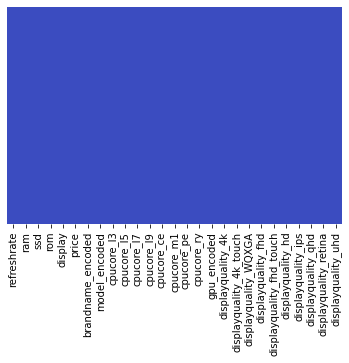

In [151]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')


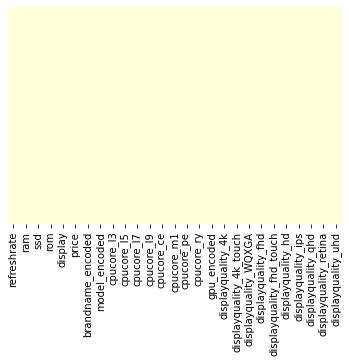

In [152]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')


# using linear regression


In [155]:
# Define the linear regression model with multiple variable
from sklearn.linear_model import LinearRegression
# Define the Model
linear_regression = LinearRegression()
# Fit the Model
linear_regression.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
# Predict
y_predic = linear_regression.predict(X_test)
y_predic

array([ 51298.91162644, 156086.92652789,  84863.06740833, 191719.50148   ,
       124955.14088288, 177629.61699795,  19658.06249119, 154145.94615717,
        56952.25452315, 171754.47085349, 206775.68724738, 184918.96152279,
       160981.81964741, 164882.74706408, 128042.89696117, 111116.24652937,
       129884.86150627,  60924.7621283 , 124248.8764395 , 181064.93496872,
       233179.96099399,  96154.44403941,  59176.54756058, 169943.69295024,
       229857.13745454, 139089.05871794, 158468.65484096, 174725.98125708,
       166727.95311459, 160928.88408838, 150497.16131002, 119573.53644799,
       105132.1194529 , 114722.18859352, 116794.32942801, 159727.89529274,
       206516.01656875, 117100.00844982, 123145.79514478, 187600.42749031,
       147434.86050365,  74758.47467919, 157586.55210991, 119727.5979612 ,
       149009.69384924, 124569.61247438, 114036.0894476 , 151649.93498977,
       111986.19006741, 126777.10560464, 186744.1802769 , 123199.58813304,
       159578.53097001, 1

In [164]:
# Accuracy Of Model
# Root Mean Squared Error on Prediction (RMSE / RMSEP)
# https://towardsdatascience.com/ways-to-evaluate-regression-models-77a3ff45ba70
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predic)
rmse = np.sqrt(mse)
rmse

36149.822250307756

# XGboot regressor

In [165]:
import xgboost
regressor=xgboost.XGBRegressor()

In [167]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [168]:
## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [170]:
from sklearn.model_selection import RandomizedSearchCV


In [171]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [172]:
random_cv.fit(X_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   34.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.7min finished


[10:52:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [173]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [174]:
random_cv.best_estimator_


XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [175]:
regressor=xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [176]:
regressor.fit(X_train,y_train)


[10:54:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [177]:
y_pred = regressor.predict(X_test)

In [184]:
y_pred

array([ 59770.83 , 166715.92 ,  53189.324, 165161.31 , 114357.516,
       167030.31 ,  54743.914, 162231.2  ,  52826.473, 203575.14 ,
       204454.92 , 135520.95 , 171914.3  , 137543.02 , 173083.06 ,
        89895.27 , 131198.22 ,  59756.953,  99190.984, 189668.11 ,
       261212.9  ,  82595.875,  65839.14 , 188480.48 , 246969.03 ,
       118758.26 , 155162.14 , 132819.1  , 161729.12 , 152397.05 ,
       120244.55 , 162973.36 , 125292.63 , 143186.97 , 110379.81 ,
       112353.1  , 178988.97 ,  91447.65 , 136842.9  , 220380.1  ,
       119590.22 ,  69428.82 , 204963.9  , 155697.58 , 164007.5  ,
       106903.22 , 104743.19 , 143117.75 , 103728.086, 158397.22 ,
       253537.55 , 113226.22 , 122694.516, 249928.4  , 249902.53 ,
       143186.97 , 129590.07 , 141441.22 , 125781.586, 152244.94 ,
        76796.74 , 117698.266,  75584.555,  88606.86 , 197815.05 ,
        93560.58 , 172586.77 ,  88197.28 , 214430.86 ,  83905.36 ,
       114092.17 ,  95281.125, 328120.34 , 138454.97 , 129954.

In [185]:
y_test

353     58990
644    158000
247     56000
494    184800
160    115000
        ...  
115    210800
786    280000
74     154455
166    108800
468    216800
Name: price, Length: 199, dtype: int64

In [178]:
# Accuracy Of Model
# Root Mean Squared Error on Prediction (RMSE / RMSEP)
# https://towardsdatascience.com/ways-to-evaluate-regression-models-77a3ff45ba70
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

26699.83667856732

# Usinf another model for differnt experiment Implementation